Feature selection

BERT integration

In [4]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install AutoModel

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


distilbert-base-uncased because:
- pre-trained BERT model
- text classification
- distilled BERT model for smaller dataset
- slightly lesser performance than bert-base-uncased
- switch to bert-base-uncased for higher accuracy and if we have more computational resources; it will be slower

maybe not BERT? Any BERT models max text length is 512 and the news texts are longer


In [12]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import torch
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from datasets import Dataset
from transformers import AutoTokenizer # Hugging Face Transformers
from transformers import AutoModel
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


In [13]:
news_df = pd.read_csv('Data/raw_data/fake_or_real_news.csv') 
seed=42
label_encoder = preprocessing.LabelEncoder()
news_df['label'] = label_encoder.fit_transform(news_df['label'].tolist())

In [14]:
train_df, test_df = train_test_split(news_df, test_size=0.2)

In [15]:
import torch 
from transformers import AutoTokenizer, AutoModel, AdamW 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english") 
model = AutoModel.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english") 
inputs = tokenizer(news_df['title'].to_list(), return_tensors='pt', padding=True, truncation=True, max_length=512) #padding and truncating
#so that each instance has the same length (required for model)
optimizer = AdamW(model.parameters(), lr=1e-5) #tested different learning rates

logistic_accuracies = []
knn_accuracies = []
rf_accuracies = []

model.train()  
for epoch in range(10):
    optimizer.zero_grad()  # Zeroing out gradients from last iteration

   s
    with torch.no_grad():
        outputs = model(**inputs)

    
    cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Getting the tokens/embeddings from the model

    
    X_train, X_test, y_train, y_test = train_test_split(
        cls_embeddings, news_df['label'].to_list(), test_size=0.2, random_state=seed
    )

    #LOGISTIC
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logistic_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}: logistic accuracy = {accuracy:.4f}")

    #KNN
    clf = KNeighborsClassifier(n_neighbors=3)

    
    clf.fit(X_train, y_train)

    
    y_pred = clf.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print("knn accuracy:", accuracy)

    #RF 
    clf = RandomForestClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)
    print("Random Forest Accuracy:", accuracy)


c:\Users\rkaya\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: logistic accuracy = 0.7222
knn accuracy: 0.6464088397790055
Random Forest Accuracy: 0.6992896606156275
Epoch 2: logistic accuracy = 0.7103
knn accuracy: 0.6621941594317285
Random Forest Accuracy: 0.691397000789266
Epoch 3: logistic accuracy = 0.7230
knn accuracy: 0.659037095501184
Random Forest Accuracy: 0.6874506708760852
Epoch 4: logistic accuracy = 0.7340
knn accuracy: 0.6479873717442778
Random Forest Accuracy: 0.6898184688239937
Epoch 5: logistic accuracy = 0.7159
knn accuracy: 0.6456195737963694
Random Forest Accuracy: 0.6937647987371744
Epoch 6: logistic accuracy = 0.7088
knn accuracy: 0.6440410418310971
Random Forest Accuracy: 0.6787687450670876
Epoch 7: logistic accuracy = 0.7261
knn accuracy: 0.6471981057616417
Random Forest Accuracy: 0.6827150749802684
Epoch 8: logistic accuracy = 0.7024
knn accuracy: 0.654301499605367
Random Forest Accuracy: 0.7087608524072613
Epoch 9: logistic accuracy = 0.7182
knn accuracy: 0.6337805840568271
Random Forest Accuracy: 0.686661404893

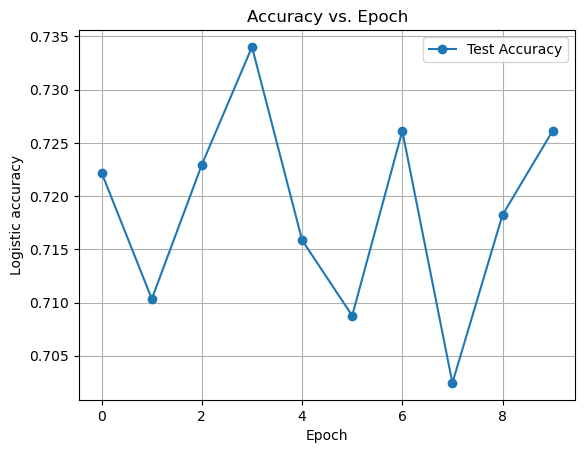

In [16]:
plt.plot(logistic_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Logistic accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.savefig('logistic.png')

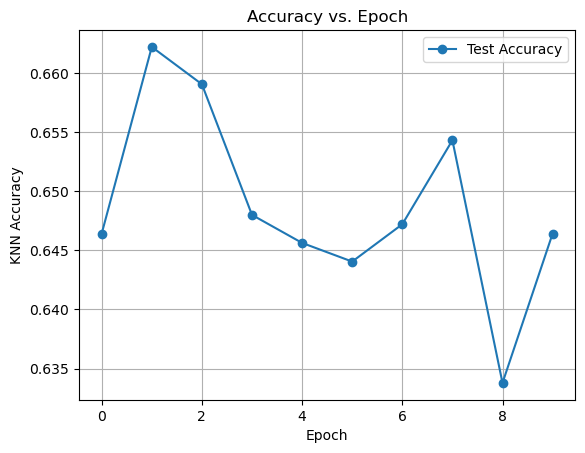

In [17]:
plt.plot(knn_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('KNN Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.savefig('knn.png')

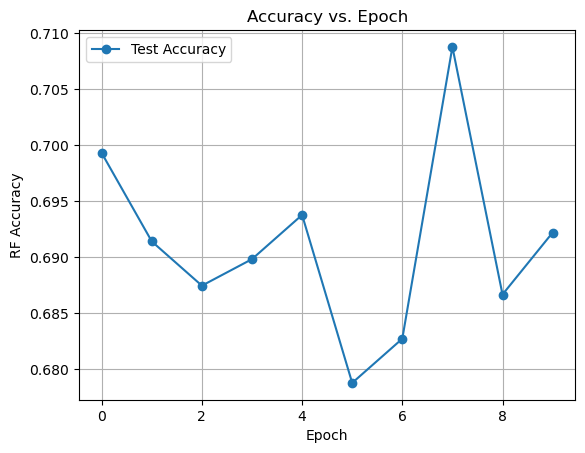

In [18]:
plt.plot(rf_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('RF Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.savefig('rf.png')